In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

In [4]:
dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv')
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv')

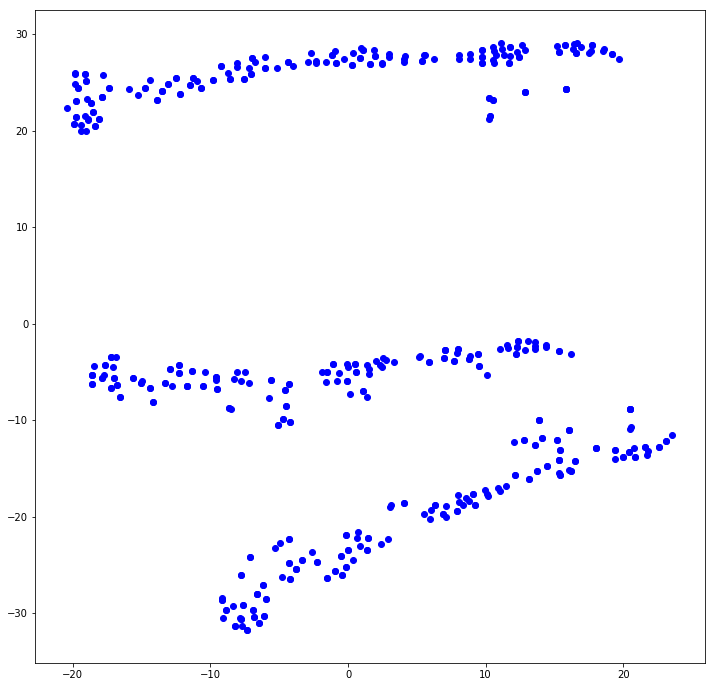

In [3]:
dados = dataset_train.iloc[:500, :280]

from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (12, 12)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

for xis in range(len(graf)):
    plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()

In [4]:
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 361 entries, V1 to V101_V143_V213_V232_V246
dtypes: float64(361)
memory usage: 144.3 MB
None


In [5]:
x_train = dataset_train.drop('y', axis=1)
y_train = dataset_train['y']

x_test = dataset_test.drop('y', axis=1)
y_test = dataset_test['y']

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100)

init = time.time()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(gbr.score(x_test, y_test)))
print(cross_val_score(gbr,x_test, y_test,scoring='r2'))
print('MAE {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 52.85515570640564 seconds
R2 score: 0.6345460597572365
[ 0.66391362  0.62420136  0.64214773]
MAE 0.37404617385937367


In [7]:
from sklearn.model_selection import cross_validate
cv = cross_validate(gbr, x_test, y_test, cv=5)
print(cv)

{'fit_time': array([ 5.6712501 ,  5.64118528,  6.24137235,  5.93599033,  6.13168979]), 'score_time': array([ 0.00669718,  0.01375747,  0.00793028,  0.00696325,  0.00541162]), 'test_score': array([ 0.668124  ,  0.64677176,  0.62331156,  0.62495446,  0.6513182 ]), 'train_score': array([ 0.73158309,  0.73177161,  0.7410149 ,  0.732862  ,  0.74180759])}


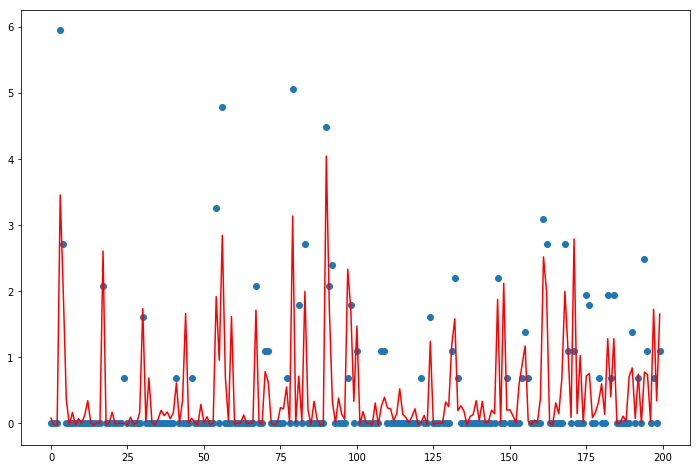

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()

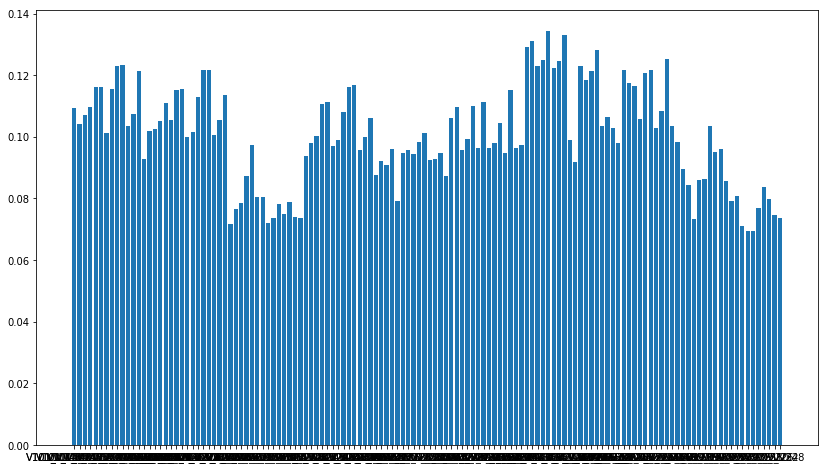

In [18]:
y_aux = dataset_train.corr()["y"] # individual correlation, variables with target
x_aux = dataset_train.columns

import matplotlib as mlp
mpl.rcParams['figure.figsize'] = (14, 8)
plt.bar(x_aux[228:len(y_aux)-1], y_aux[228:len(y_aux)-1])
plt.show()